<a href="https://colab.research.google.com/github/SaiRam-43/Python_list/blob/main/Named_Entity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
sent="Ram is studying at Malla Reddy University in Hyderabad, India"

In [2]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [3]:
!pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 4.2 MB/s eta 0:00:00


In [5]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [9]:
import nltk
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


True

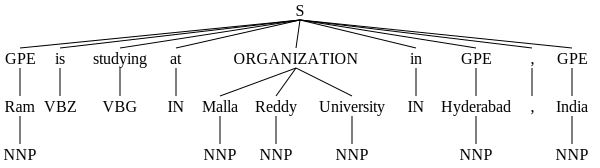

In [10]:
import nltk
from nltk import ne_chunk
from nltk import word_tokenize
ne_chunk(nltk.pos_tag(word_tokenize(sent)),binary=False)

**Using spaCy**

In [11]:
!pip install spacy

In [12]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 65.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [13]:
import spacy
nlp=spacy.load('en_core_web_sm')
doc=nlp(u'Apple is ready to launch new phone worth $10000 in New york time sqare ')
for ent in doc.ents:
  print(ent.text,ent.start_char,ent.end_char,ent.label_)

Apple 0 5 ORG
10000 42 47 MONEY
New york 51 59 GPE


**Use Case:Extracting Entities from News Articles**

In [14]:
import spacy
nlp=spacy.load('en_core_web_sm')

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [15]:
text="""
Elon Musk,the CEO of SpaceX and Tesla,announced that SpaceX's Starship will be launching its first crewed mission to Mars in 2027.
The mission,which will involve stronents fron NASA,will be the first of its kind,and it  will take place at the Kennedy Space Center in Floride.
Musk emphasized that the project would push the boundaries of space exploration.
"""

In [17]:
doc=nlp(text)
for ent in doc.ents:
  print(f"Entity: {ent.text},Label:{ent.label_}")

Entity: Elon Musk,Label:PERSON
Entity: SpaceX,Label:NORP
Entity: Tesla,Label:ORG
Entity: first,Label:ORDINAL
Entity: Mars,Label:LOC
Entity: 2027,Label:DATE
Entity: NASA,Label:ORG
Entity: first,Label:ORDINAL
Entity: the Kennedy Space Center in Floride,Label:FAC


**Visualization**

In [18]:
from spacy import displacy
displacy.render(doc,style='ent')

In [19]:
import pandas as pd
entities=[(ent.text,ent.label_,ent.lemma_) for ent in doc.ents]
df=pd.DataFrame(entities,columns=['text','type','lemma'])
print(df)


                                  text     type  \
0                            Elon Musk   PERSON   
1                               SpaceX     NORP   
2                                Tesla      ORG   
3                                first  ORDINAL   
4                                 Mars      LOC   
5                                 2027     DATE   
6                                 NASA      ORG   
7                                first  ORDINAL   
8  the Kennedy Space Center in Floride      FAC   

                                 lemma  
0                            Elon Musk  
1                               SpaceX  
2                                Tesla  
3                                first  
4                                 Mars  
5                                 2027  
6                                 NASA  
7                                first  
8  the Kennedy Space Center in Floride  
